In [1]:
import requests
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
from sodapy import Socrata

I am a bit too confused for the evening to continue on this for the evening, but i look forward to tackling it on Saturday

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

response = requests.get(endpoint)

Using a smarter person's documentation on how to get SODA consumer API working
https://holowczak.com/getting-started-with-nyc-opendata-and-the-socrata-api/5/

In [5]:
data_url='data.nashville.gov'    # The Host Name for the API endpoint (the https:// part will be added automatically)
data_set='fuaa-r5cm'    # The data set at the API endpoint (311 data in this case)
app_token='1NEpltWqHEPKa8Gs8qXhUIyel'   # The app token created in the prior steps
client = Socrata(data_url,app_token)      # Create the client to point to the API endpoint
# Set the timeout to 60 seconds    
client.timeout = 60
# Retrieve the first 2000 results returned as JSON object from the API
# The SoDaPy library converts this JSON object to a Python list of dictionaries
results = client.get(data_set, limit=44000)
# Convert the list of dictionaries to a Pandas data frame
df = pd.DataFrame.from_records(results)
# Save the data frame to a CSV file
df.to_csv("my_top500searches.csv")

In [6]:
print(results)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
with open('../data/keys.json') as fi:
    credentials = json.load(fi)

In [8]:
metadata = client.get_metadata(data_set)
[x['name'] for x in metadata['columns']]

['Month Name', 'Month', 'Year', 'Query Count', 'Query Text']

In [17]:
endpoint0 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=44000'
#fixed from a catch from Abi, mahalo abi
response0 = requests.get(endpoint0)
len(response0.json())

43677

Q1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?
August had the most!

In [18]:
endpoint1 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire&$order= query_count DESC&$limit=44000'

response1 = requests.get(endpoint1)

response1.json()

[{'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'December',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_tex

Q2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?
Looks like 1000!(?)

In [19]:
endpoint2 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where= query_count > 100&$limit=44000'

response2 = requests.get(endpoint2)

len(response2.json())

1262

Q3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?
56 times!

In [20]:
endpoint3 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=codes&$where= query_count > 100&$limit=44000'

response3 = requests.get(endpoint3)

len(response3.json())

56

Q4.Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [21]:
df['query_count'] = df['query_count'].astype(int)
df

ValueError: cannot convert float NaN to integer

Ok, I'm beginning to think this isn't what you guys wanted us to do.

In [23]:
maps_df= df[df['query_text']=='maps']
maps_df['yearmonth'] = maps_df['month_name'] + maps_df['year']
maps_df['query_count'] = maps_df['query_count'].astype(int)
maps_df

C:\Users\phili\AppData\Local\Temp/ipykernel_17520/3059076015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps_df['yearmonth'] = maps_df['month_name'] + maps_df['year']
C:\Users\phili\AppData\Local\Temp/ipykernel_17520/3059076015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps_df['query_count'] = maps_df['query_count'].astype(int)


,month_name,year,query_count,query_text,month,yearmonth
2,January,2014,97,maps,NaN,January2014
503,February,2014,140,maps,NaN,February2014
1005,March,2014,144,maps,NaN,March2014
1503,April,2014,152,maps,NaN,April2014
2003,May,2014,119,maps,NaN,May2014
...,...,...,...,...,...,...
39196,November,2020,86,maps,11,November2020
39688,December,2020,113,maps,12,December2020
41188,March,2021,132,maps,3,March2021
41683,April,2021,148,maps,4,April2021


C:\Users\phili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


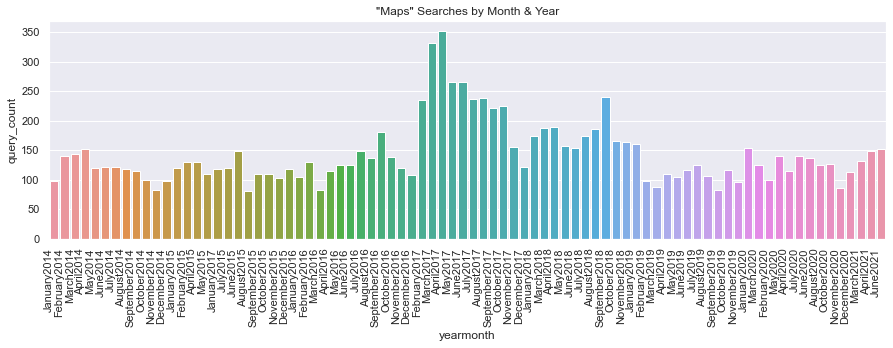

In [46]:
sns.set(rc={"figure.figsize":(15, 4)})
maps_bar = sns.barplot(maps_df['yearmonth'],maps_df['query_count'])
maps_bar.set_xticklabels(maps_bar.get_xticklabels(), rotation=90, horizontalalignment='right')
maps_bar.set_title('"Maps" Searches by Month & Year');

Wow what a beautiful and engaing chart LOL (ok i fixed the chart, in seaborn you need to specify the plot size before you make it)

Q6. Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets.